# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2021**

Мягкий дедлайн: **25.10.21 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **28.10.21 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$
    \nabla_{w} Q(w) = - \dfrac{2}{\ell} \left( y - Xw \right)^T X
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam.jpg)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/29933/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/29933/run-report/55652133/


* **StochasticDescent**: https://contest.yandex.ru/contest/29933/run-report/55652137/


* **MomentumDescent**: https://contest.yandex.ru/contest/29933/run-report/55652143/


* **Adam**: https://contest.yandex.ru/contest/29933/run-report/55652155/


* **LinearRegression**: https://contest.yandex.ru/contest/29933/run-report/55652168/

Ник Ilya Nikitin

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [7]:
data = pd.read_csv('autos.csv')

In [8]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [9]:
data.isnull().sum()

brand                0
model                0
vehicleType          0
gearbox              0
fuelType             0
notRepairedDamage    0
powerPS              0
kilometer            0
autoAgeMonths        0
price                0
dtype: int64

<AxesSubplot:xlabel='price', ylabel='Count'>

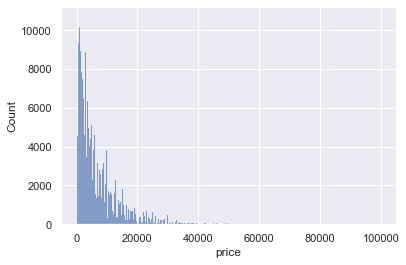

In [10]:
sns.histplot(data.price)

<AxesSubplot:xlabel='price', ylabel='Count'>

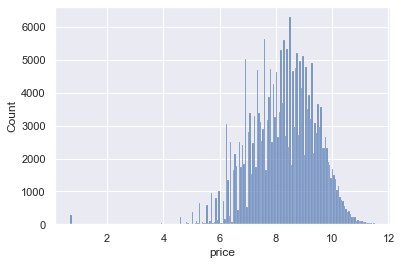

In [11]:
sns.histplot(np.log1p(data.price))

In [12]:
data = data[data.price > 100]
data.price = np.log1p(data.price)

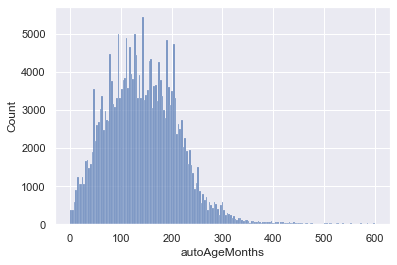

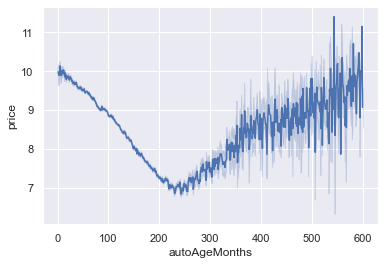

In [13]:
sns.histplot(data.autoAgeMonths)
plt.show()
sns.lineplot(data = data, x = 'autoAgeMonths', y = 'price')
plt.show()

Сделаем два признака, чтобы зависимости были линейными

In [14]:
data['autoAgeMonths_2'] = data['autoAgeMonths'][data['autoAgeMonths'] > 230]
data['autoAgeMonths'] = data['autoAgeMonths'][data['autoAgeMonths'] <= 230]

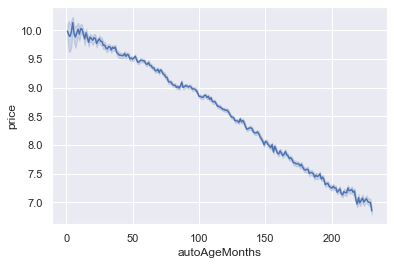

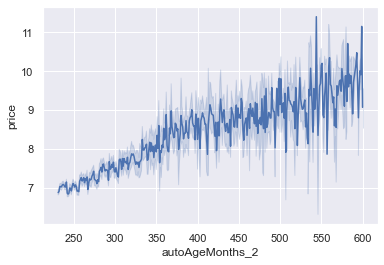

In [15]:
sns.lineplot(data = data, x = 'autoAgeMonths', y = 'price')
plt.show()
sns.lineplot(data = data, x = 'autoAgeMonths_2', y = 'price')
plt.show()

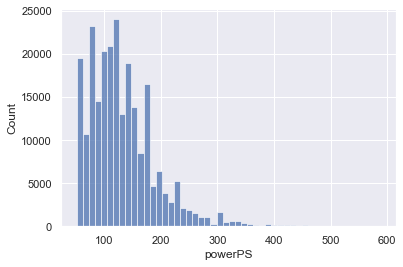

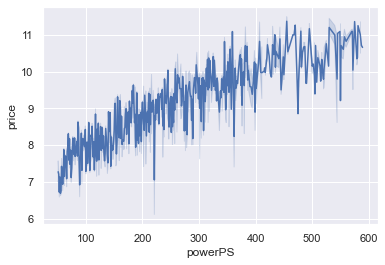

In [16]:
sns.histplot(data.powerPS, bins = 50)
plt.show()
sns.lineplot(data = data, x = 'powerPS', y = 'price')
plt.show()

Шумно, но сойдет

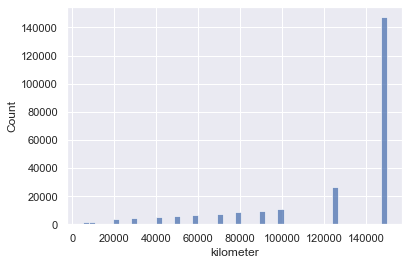

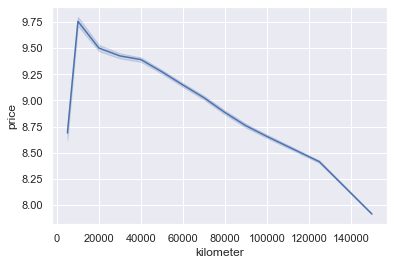

In [17]:
sns.histplot(data.kilometer, bins = 50)
plt.show()
sns.lineplot(data = data, x = 'kilometer', y = 'price')
plt.show()

Снова поделим на 2 прямые

In [18]:
data['kilometer_2'] = data.kilometer[data.kilometer >= 10000]
data['kilometer'] = data.kilometer[data.kilometer <= 10000]

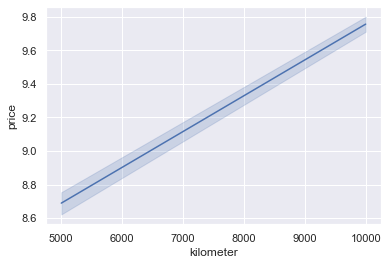

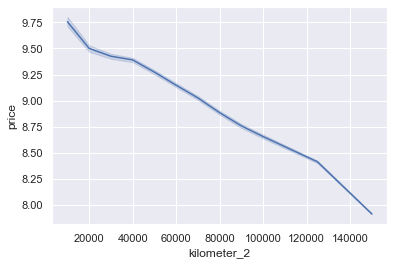

In [19]:
sns.lineplot(data = data, x = 'kilometer', y = 'price')
plt.show()
sns.lineplot(data = data, x = 'kilometer_2', y = 'price')
plt.show()

In [20]:
data.fillna(0, inplace = True)

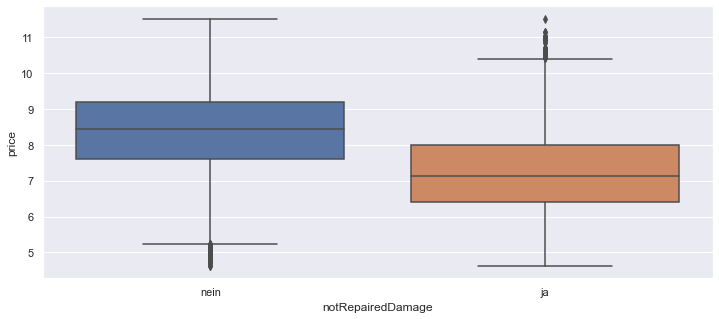

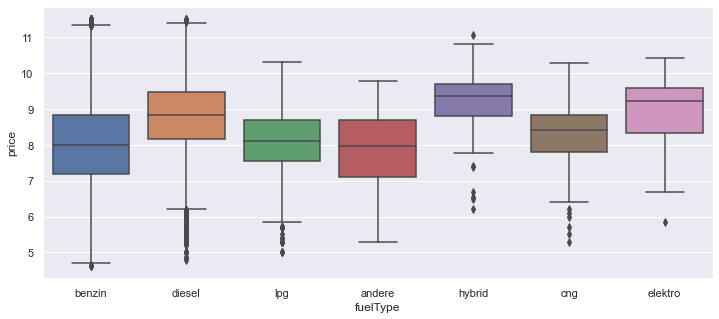

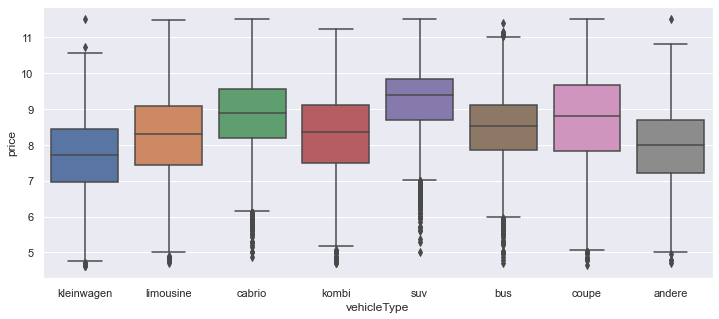

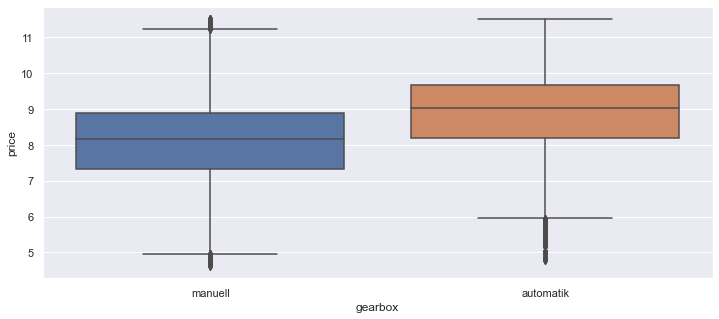

In [21]:
for x in ['notRepairedDamage', 'fuelType', 'vehicleType', 'gearbox']:
    plt.figure(figsize = (12, 5))
    sns.boxplot(data = data, x = x, y = 'price')
    plt.show()

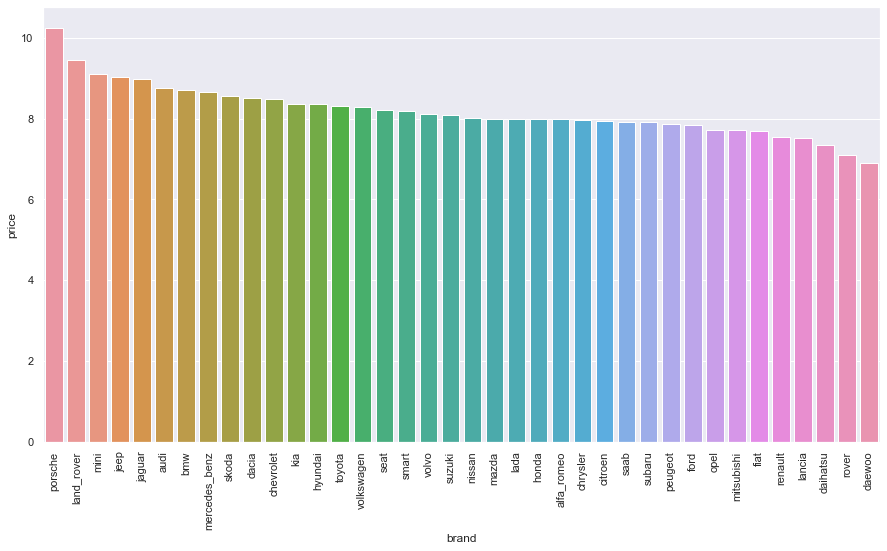

In [22]:
plt.figure(figsize = (15, 8))
df = data
df = pd.DataFrame(df.groupby(by = 'brand').mean().sort_values(by = 'price', ascending = False))
df['brand'] = df.index
sns.barplot(data = df, x = 'brand', y = 'price')
plt.xticks(rotation = 90)
plt.show()

А теперь представим, что у ассистента завалялся 4к монитор

Populating the interactive namespace from numpy and matplotlib


C:\Users\Ilya\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['gradient', 'diff']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


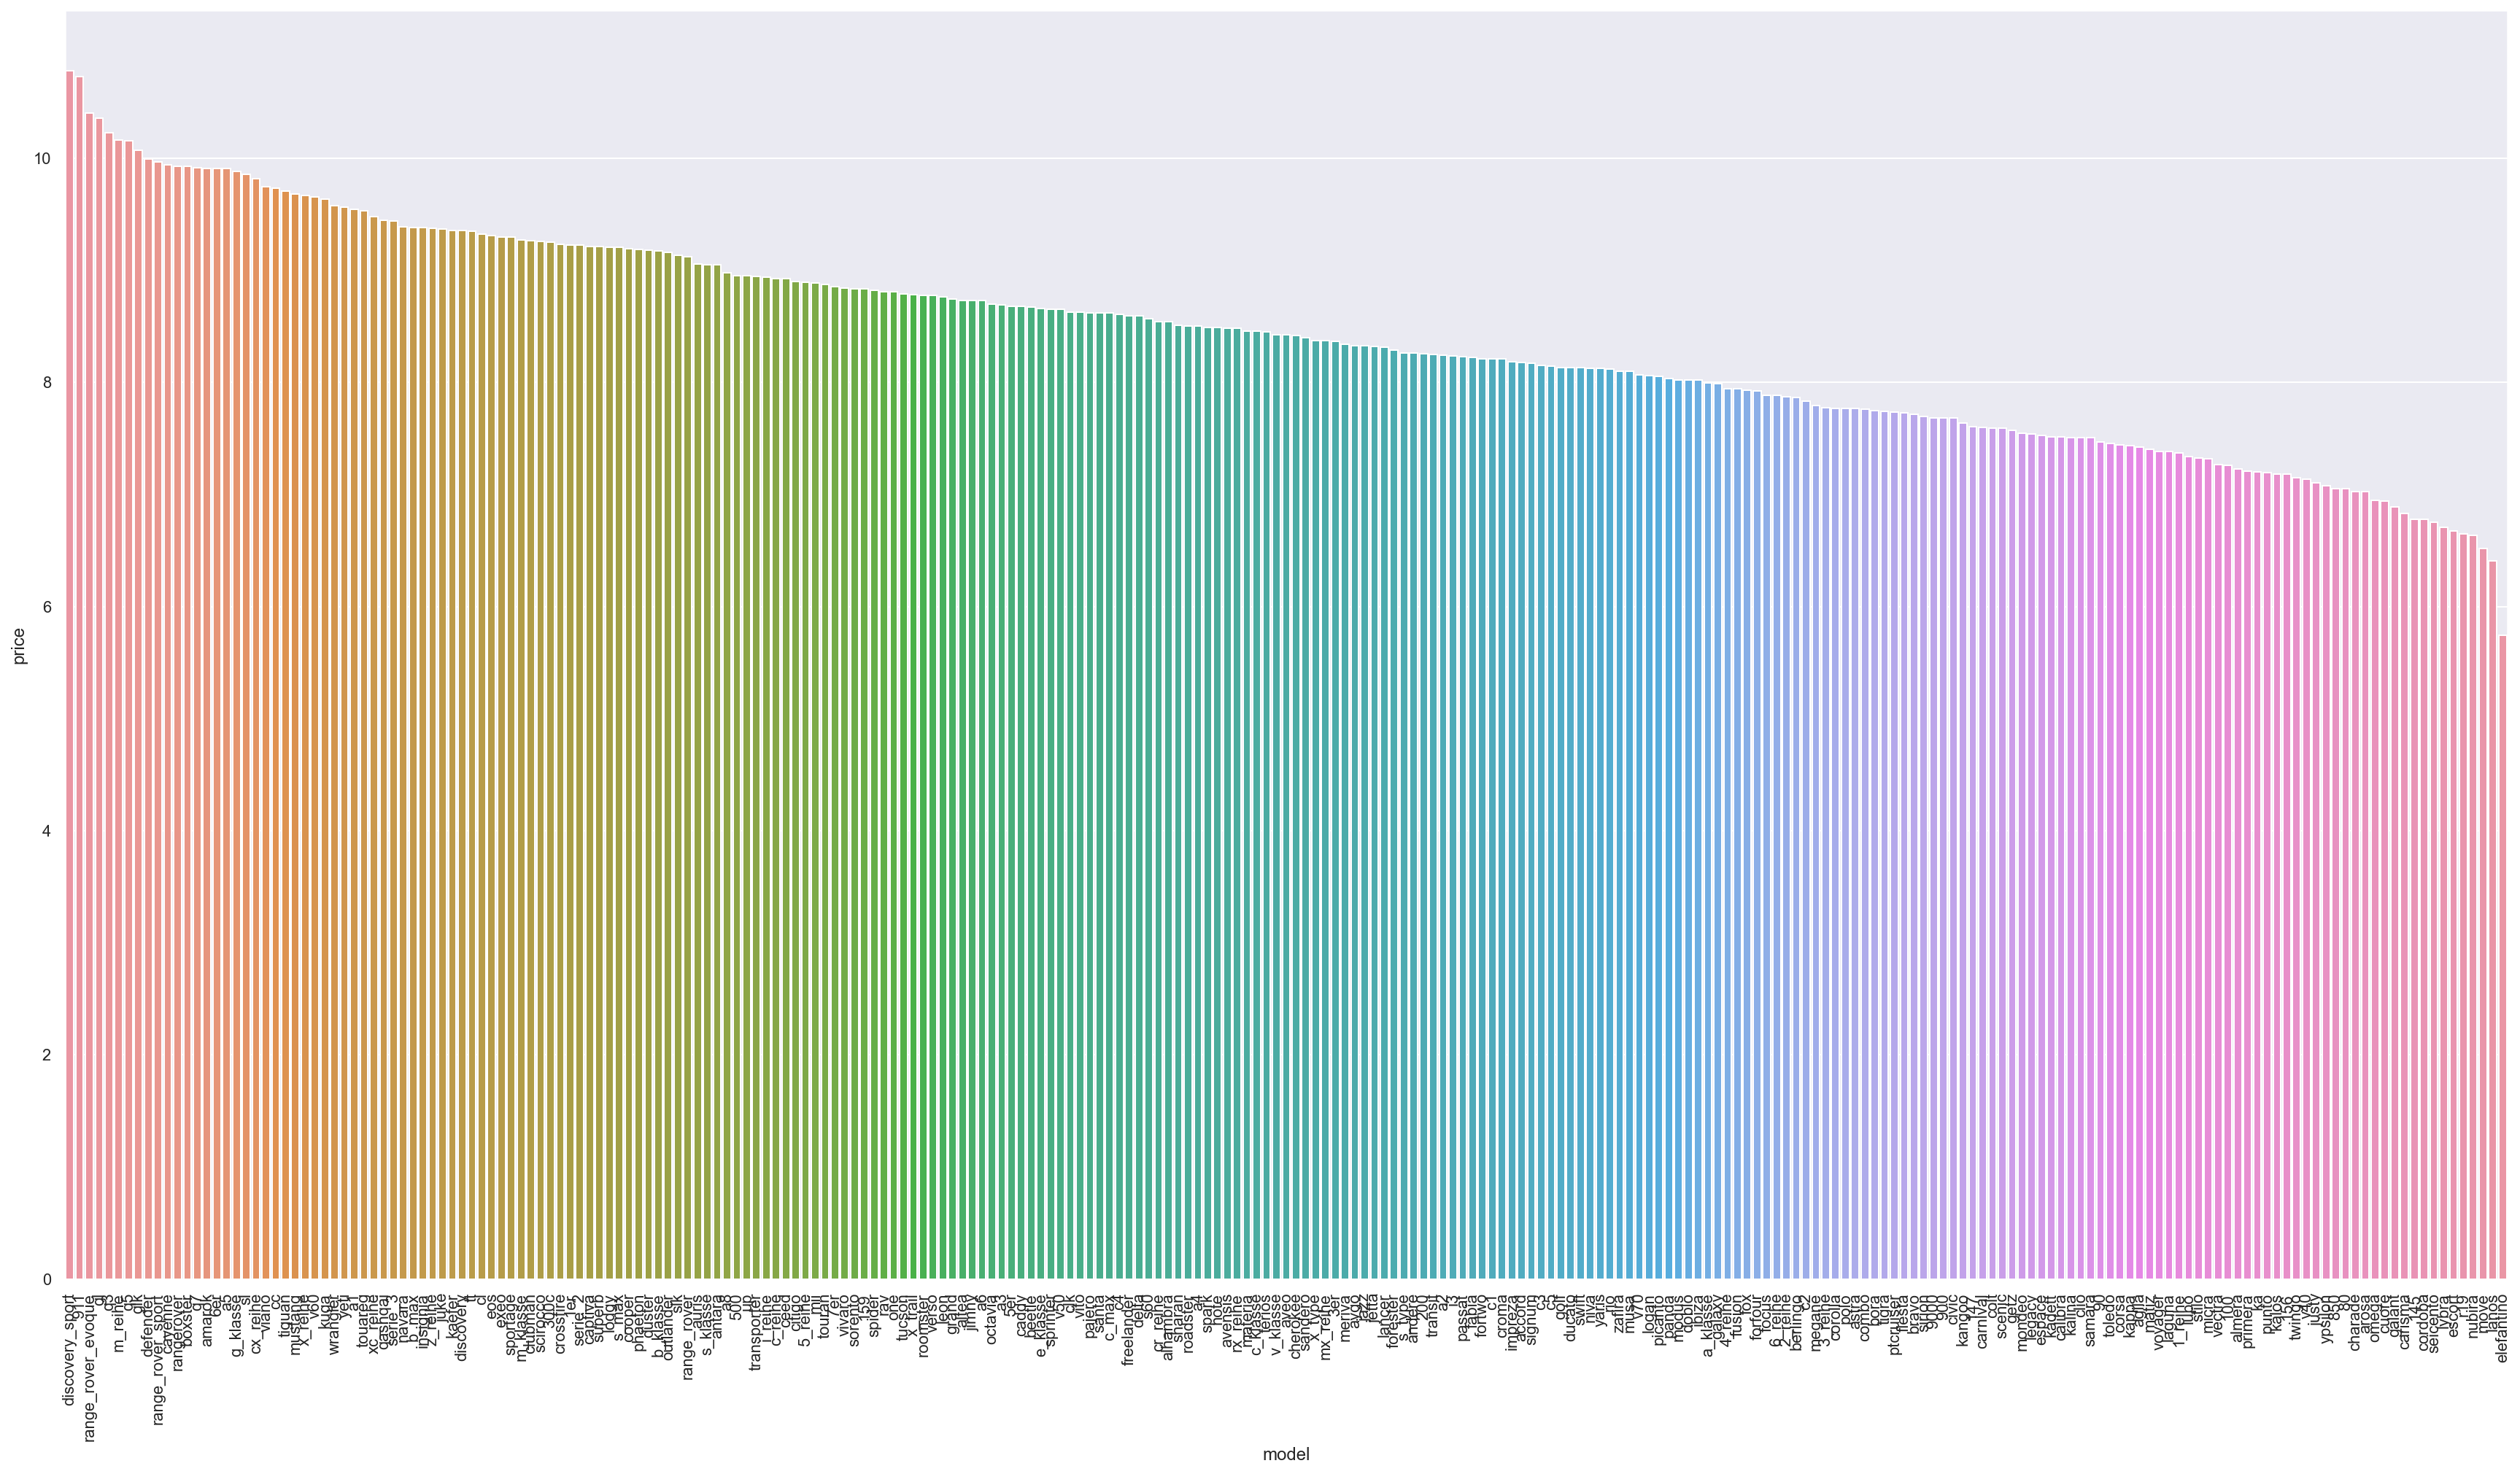

In [23]:
%pylab inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize = (30, 16))
df = data
df = pd.DataFrame(df.groupby(by = 'model').mean().sort_values(by = 'price', ascending = False))
df['model'] = df.index
sns.barplot(data = df, x = 'model', y = 'price')
plt.xticks(rotation = 90)
plt.show()

Исходя из графиков, можно сделать вывод, что все категориальные признаки полезные

In [24]:
categorical = ['brand', 'model','vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'kilometer_2', 'autoAgeMonths', 'autoAgeMonths_2']
other = []

In [25]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['price']

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/10, random_state = 51261)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 1/9, random_state = 51261)
for df in [y_train, y_test, y_val]:
    df.reset_index(inplace = True, drop = True)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [79]:
from tqdm import tqdm
from sklearn.metrics import r2_score
best_r2 = [0,0,0,0]
best_model = [0,0,0,0]
best = {}
i = 0
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    if descent_name == 'adam':
        lambdas = np.logspace(-1, 2, 30)
    else:
        lambdas = np.logspace(-1, 0.2, 30)
    for lambda_ in lambdas:
        descent_config = {
            'descent_name': descent_name,
            'kwargs': { 'lambda_': lambda_,
                'dimension': X_train.shape[1],
            }
        }
        
        regression = LinearRegression(
            descent_config=descent_config)
        
        model = regression.fit(X_train, y_train)
        y_pred_val = model.predict(X_val)
        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        iter_ = model.i
        if r2_score(y_val, y_pred_val) > best_r2[i]:
            best_r2[i] = r2_score(y_val, y_pred_val)
            best_model[i] = model
            best[i] = {'descent_name' : descent_name, 
                       'iteration' : iter_, 
                       'lambda' : lambda_, 
                       'Train R2' : r2_score(y_train, y_pred_train),
                       'Test R2' : r2_score(y_test, y_pred_test),
                       'Val R2' : r2_score(y_val, y_pred_val),
                       'Train loss' : model.calc_loss(X_train, y_train),
                       'Test loss' : model.calc_loss(X_test, y_test),
                       'Val loss' : model.calc_loss(X_val, y_val)}
    i+=1

### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [92]:
df = pd.DataFrame(best).T.set_index('descent_name')
df

,iteration,lambda,Train R2,Test R2,Val R2,Train loss,Test loss,Val loss
descent_name,,,,,,,,
full,67,1.58489,0.75434,0.748294,0.755171,0.305079,0.311948,0.303357
stochastic,239,0.459271,0.737662,0.728832,0.738152,0.32579,0.336067,0.324446
momentum,143,1.19086,0.787516,0.779034,0.787438,0.263877,0.27385,0.263378
adam,138,3.56225,0.802054,0.794065,0.803066,0.245824,0.255222,0.244014


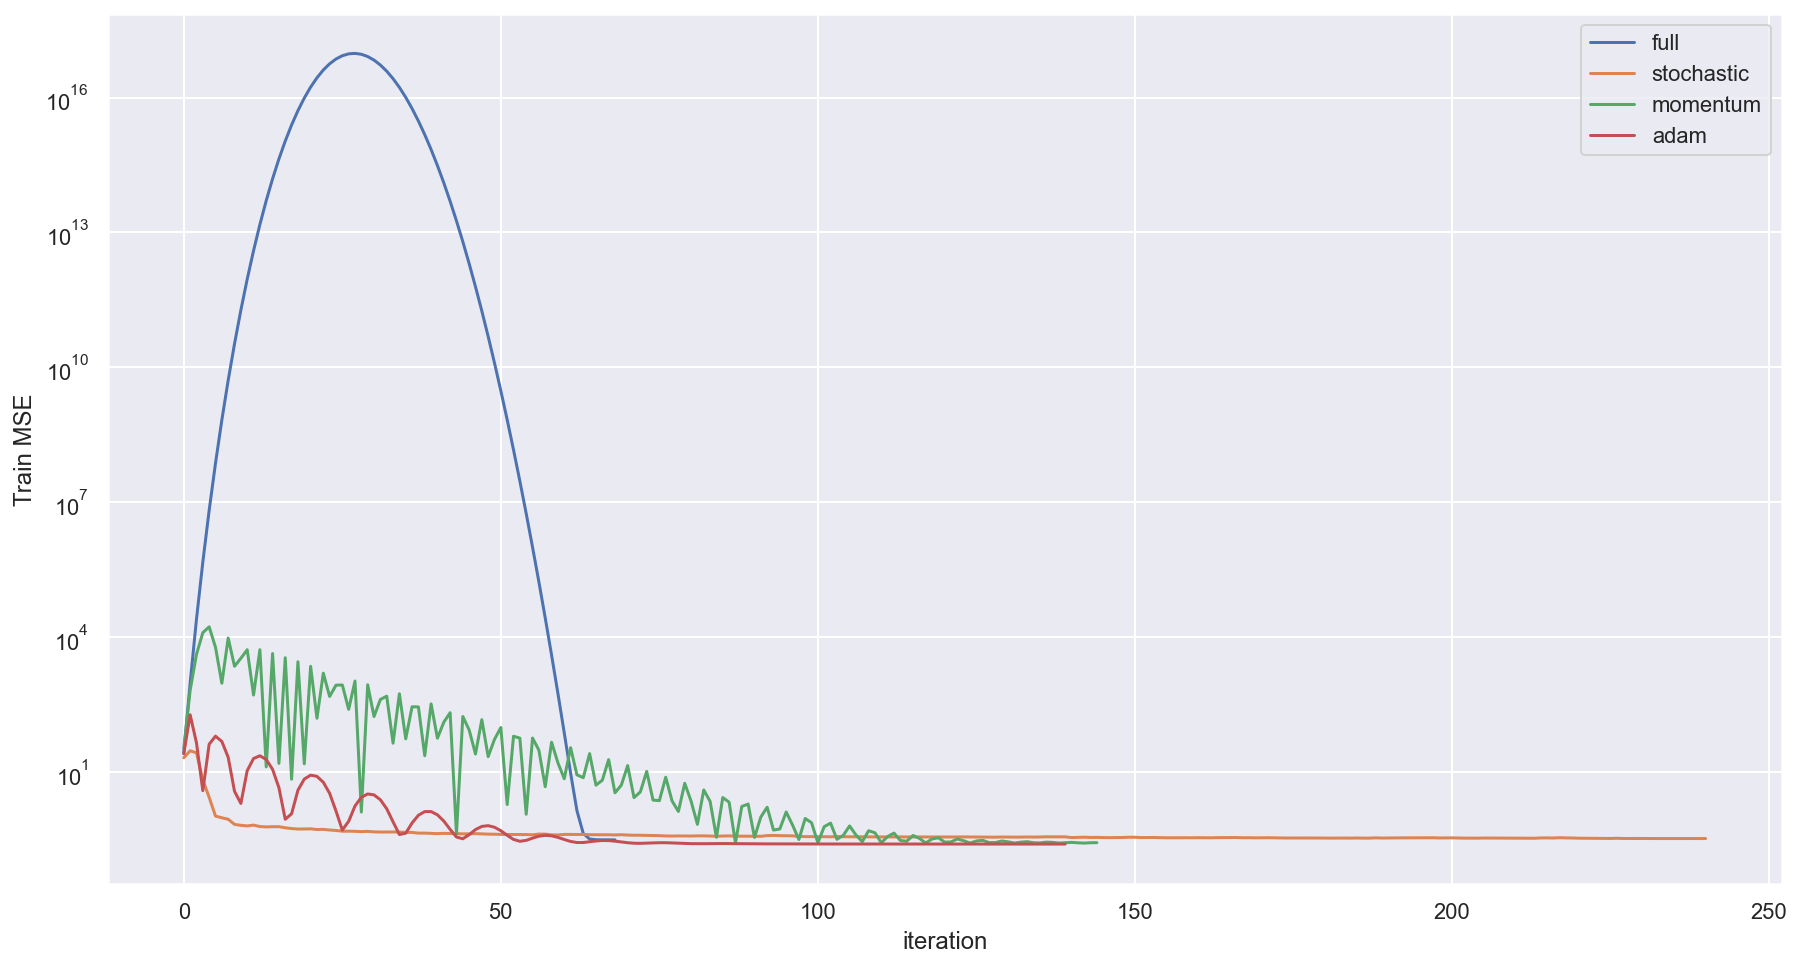

In [90]:
plt.figure(figsize = (15, 8))
for i in range(4):
    plt.plot(best_model[i].loss_history, label = best[i]['descent_name'])
plt.xlabel('iteration')
plt.ylabel('Train MSE')
plt.yscale('log')
plt.legend()
plt.show()

Чет мсе немного расходится вблизи 30 шага, зато сошелся быстрее всех по итогу (правда вал лосс не самый лучший из всех)

По лоссу вообще лучший адам, моментум не особо отстает, но сходится в целом медленнее, поэтому по всем параметрам оптимальный метод - адам (наверное, единственный минус это много гиперпараметров)

Стохастический спуск быстрее всех сошелся к какому-то плато (которое по лоссу хуже конечных результатов других методов), а затем долго пытался отфлуктуировать к значению, на котором выполнится критерий останова. В целом можно сказать что для достижения быстрой сходимости можно использовать стохастический спуск, но лосс будет не самым лучшим

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [102]:
df['lambda'].loc['stochastic']

0.4592709387993504

In [103]:
batch_sizes = np.arange(5, 500, 10)

In [133]:
from time import time
best_r2_s = 0
k_0 = 10
best_s = {}
j = 0
for batch_size in batch_sizes:
    descent_config = {
                    "descent_name": "stochastic",
                    "kwargs": {'lambda_': df['lambda'].loc['stochastic'], 
                               "dimension": X_train.shape[1], 
                               "batch_size": batch_size},
                }
    
    regression = LinearRegression(
        descent_config = descent_config)
    
    i = 0
    t = 0
    
    for k in range(k_0):
        t1 = time()
        model = regression.fit(X_train, y_train)
        t2 = time()
        iter_ = model.i 
        i += iter_
        t += t2 - t1
    
    best_s[j] = {
        'iteration' : i / k_0 ,
        'time' : t / k_0,
        'batch_size' : batch_size
    }
    
    j += 1

In [138]:
df_s = pd.DataFrame(best_s).T.set_index('batch_size')
df_s.head()

,iteration,time
batch_size,,
5.0,87.3,5.187611
15.0,49.8,3.155751
25.0,44.4,2.833694
35.0,35.5,2.402258
45.0,36.2,2.362061


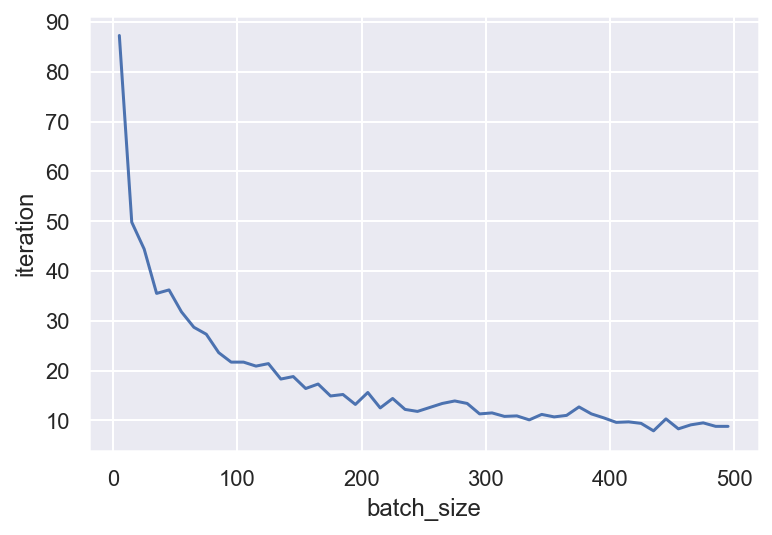

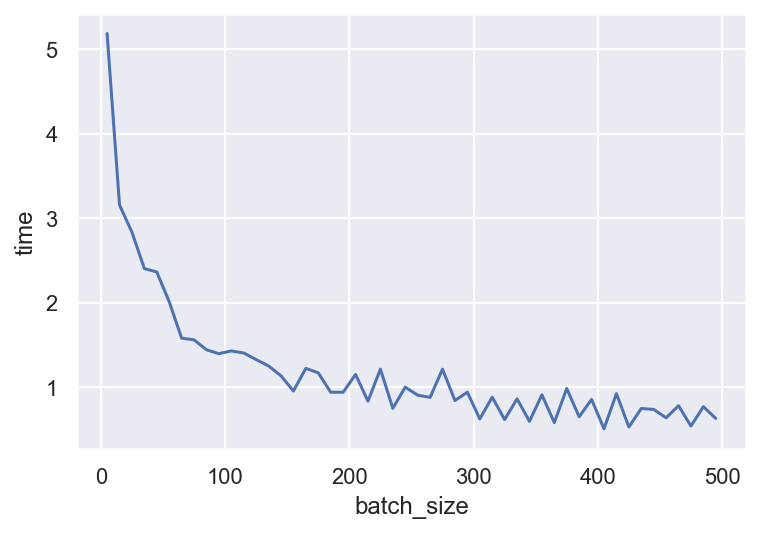

In [139]:
sns.lineplot(data = df_s, x = 'batch_size', y = 'iteration')
plt.show()
sns.lineplot(data = df_s, x = 'batch_size', y = 'time')
plt.show()

Слишком маленький батч брать плохо, потому что сходится такой спуск довольно долго, хоть и сами батчи считаюся быстрее (но выгоднее все-равно брать большие батчи), в данном случае достаточно батча порядка 200-300 и больше

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/29933/run-report/55652190/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [141]:
best_r2 = [0,0,0,0]
best_model_m = [0,0,0,0]
best_m = {}
i = 0
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    if descent_name == 'adam':
        lambdas = np.logspace(-1, 2, 15)
    else:
        lambdas = np.logspace(-1, 0.2, 15)
    mus = np.logspace(-7, -2, 10)
    for mu in mus:
        for lambda_ in tqdm(lambdas):
            descent_config = {
                'descent_name': descent_name,
                'regularized': True,
                'kwargs': { 'lambda_': lambda_,
                    'dimension': X_train.shape[1],
                }
            }

            regression = LinearRegression(
                descent_config=descent_config)

            model = regression.fit(X_train, y_train)
            y_pred_val = model.predict(X_val)
            if r2_score(y_val, y_pred_val) > best_r2[i]:
                best_r2[i] = r2_score(y_val, y_pred_val)
                best_model_m[i] = model
                best_m[i] = {'descent_name' : descent_name, 
                           'iteration' : model.i,
                           'mu' : mu,
                           'lambda' : lambda_, 
                           'Train R2' : r2_score(y_train, model.predict(X_train)),
                           'Test R2' : r2_score(y_test, model.predict(X_test)),
                           'Val R2' : r2_score(y_val, y_pred_val),
                           'Train loss' : model.calc_loss(X_train, y_train),
                           'Test loss' : model.calc_loss(X_test, y_test),
                           'Val loss' : model.calc_loss(X_val, y_val)}
    i+=1

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [03:18<00:00, 13.25s/it]


In [145]:
df_m = pd.DataFrame(best_m).T.set_index('descent_name')
df_m

,iteration,mu,lambda,Train R2,Test R2,Val R2,Train loss,Test loss,Val loss
descent_name,,,,,,,,,
full,55,5.99484e-05,1.58489,0.747112,0.737575,0.750971,0.314054,0.325231,0.308562
stochastic,299,4.64159e-06,0.876712,0.74359,0.732257,0.74413,0.318428,0.331823,0.317038
momentum,116,0.01,1.30103,0.791164,0.783077,0.791497,0.259347,0.26884,0.258348
adam,145,1.6681e-05,1.9307,0.802013,0.793864,0.803244,0.245875,0.255471,0.243793


In [146]:
df

,iteration,lambda,Train R2,Test R2,Val R2,Train loss,Test loss,Val loss
descent_name,,,,,,,,
full,67,1.58489,0.75434,0.748294,0.755171,0.305079,0.311948,0.303357
stochastic,239,0.459271,0.737662,0.728832,0.738152,0.32579,0.336067,0.324446
momentum,143,1.19086,0.787516,0.779034,0.787438,0.263877,0.27385,0.263378
adam,138,3.56225,0.802054,0.794065,0.803066,0.245824,0.255222,0.244014


Как видно из табличек, с использованием регуляризации качество на трейне и тесте возрастает в инерционном и стохастическом спусках и падает на ванилле и адаме. Изменение качества на всех методах кроме инерционного скорее всего связано с флуктуациями, которые особо нет смысла анализировать. В инерционном методе видно, что лучший mu - крайний из предложенных мной, поэтому попробую еще разочек прогнать модели теперь уже на бОльших mu.

In [151]:
best_r2 = 0
for mu in np.logspace(-2, 4, 10):
    for lambda_ in tqdm(np.logspace(0, 0.2, 3)):
        descent_config = {
            'descent_name': 'momentum',
            'regularized': True,
            'kwargs': { 'lambda_': lambda_,
                'dimension': X_train.shape[1],
            }
        }
        regression = LinearRegression(
            descent_config=descent_config)

        model = regression.fit(X_train, y_train)
        y_pred_val = model.predict(X_val)
        
        if r2_score(y_val, y_pred_val) > best_r2:
            best_r2 = r2_score(y_val, y_pred_val)
            best_model_mom = model
            best_mom = {'descent_name' : descent_name, 
                           'iteration' : model.i,
                           'mu' : mu,
                           'lambda' : lambda_, 
                           'Train R2' : r2_score(y_train, model.predict(X_train)),
                           'Test R2' : r2_score(y_test, model.predict(X_test)),
                           'Val R2' : r2_score(y_val, y_pred_val),
                           'Train loss' : model.calc_loss(X_train, y_train),
                           'Test loss' : model.calc_loss(X_test, y_test),
                           'Val loss' : model.calc_loss(X_val, y_val)}

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:26<00:00,  8.89s/it]


In [156]:
best_mom

{'descent_name': 'adam',
 'iteration': 115,
 'mu': 0.046415888336127774,
 'lambda': 1.2589254117941673,
 'Train R2': 0.7899604502974165,
 'Test R2': 0.7804872762884185,
 'Val R2': 0.7893605924716691,
 'Train loss': 0.2608422251736764,
 'Test loss': 0.27204903630401145,
 'Val loss': 0.2609948873883868}

Как видно, оптимум был недалеко, хотя и в этот раз качество даже похуже, поэтому можно верить тому результату, что мы получили ранее

In [157]:
df

,iteration,lambda,Train R2,Test R2,Val R2,Train loss,Test loss,Val loss
descent_name,,,,,,,,
full,67,1.58489,0.75434,0.748294,0.755171,0.305079,0.311948,0.303357
stochastic,239,0.459271,0.737662,0.728832,0.738152,0.32579,0.336067,0.324446
momentum,143,1.19086,0.787516,0.779034,0.787438,0.263877,0.27385,0.263378
adam,138,3.56225,0.802054,0.794065,0.803066,0.245824,0.255222,0.244014


In [158]:
df_m

,iteration,mu,lambda,Train R2,Test R2,Val R2,Train loss,Test loss,Val loss
descent_name,,,,,,,,,
full,55,5.99484e-05,1.58489,0.747112,0.737575,0.750971,0.314054,0.325231,0.308562
stochastic,299,4.64159e-06,0.876712,0.74359,0.732257,0.74413,0.318428,0.331823,0.317038
momentum,116,0.01,1.30103,0.791164,0.783077,0.791497,0.259347,0.26884,0.258348
adam,145,1.6681e-05,1.9307,0.802013,0.793864,0.803244,0.245875,0.255471,0.243793


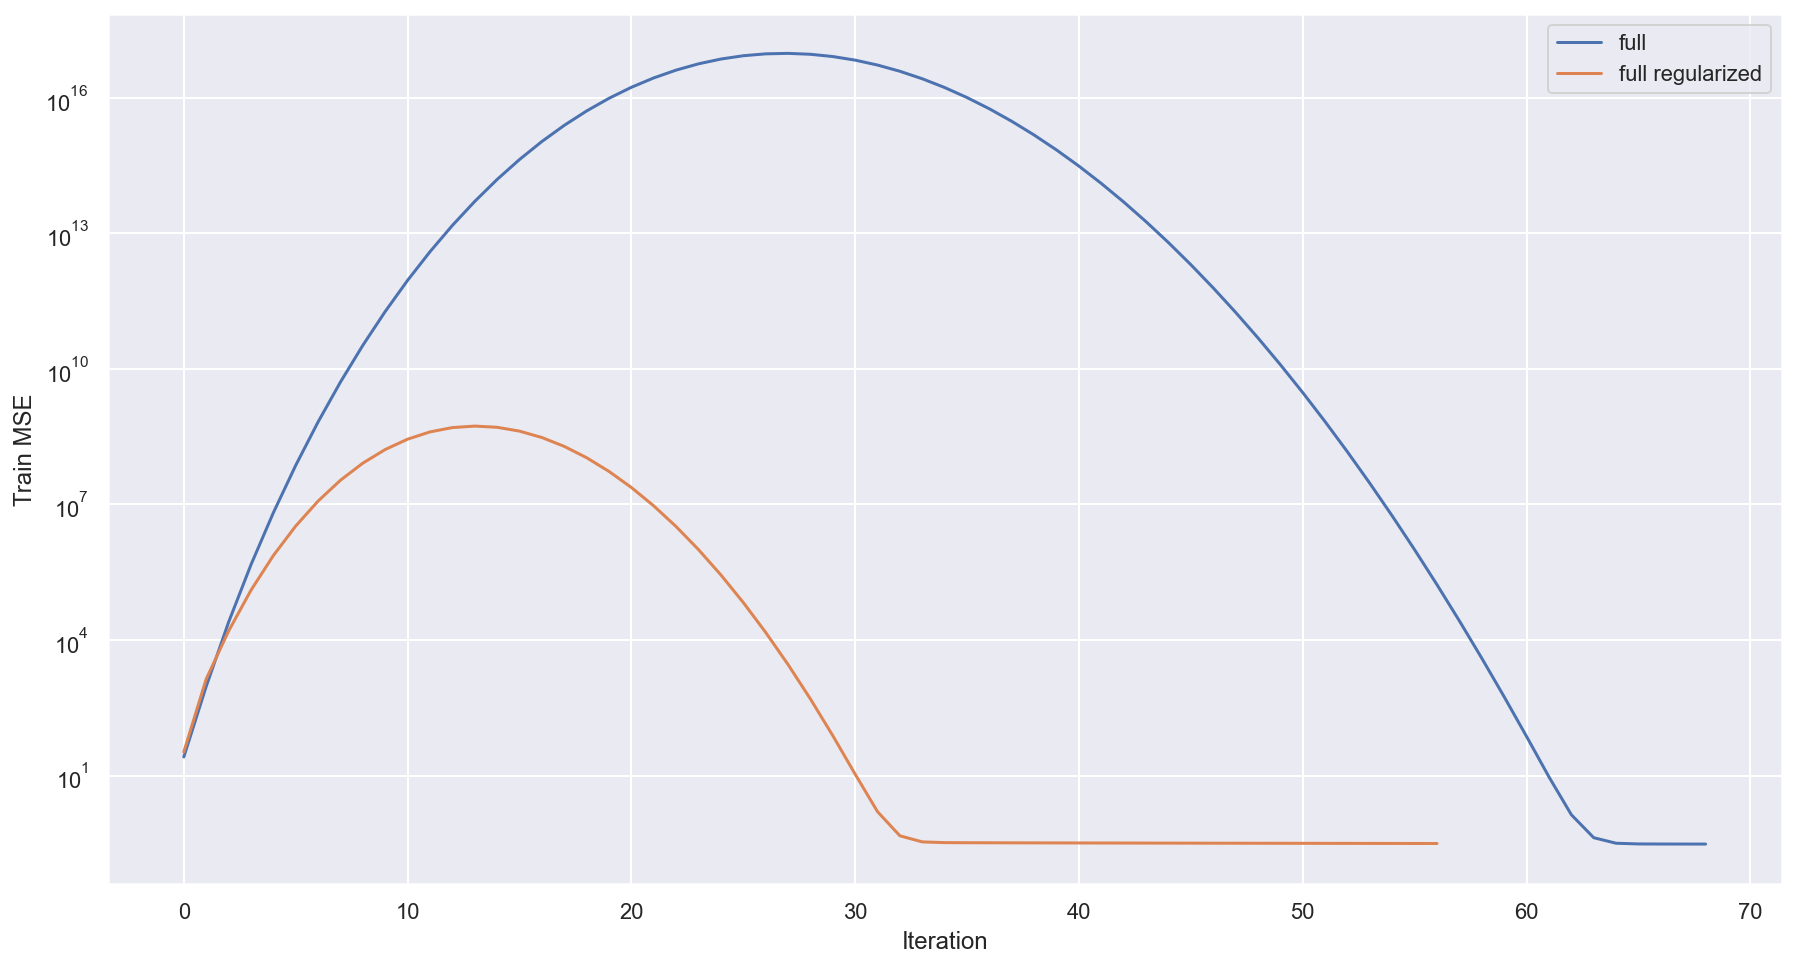

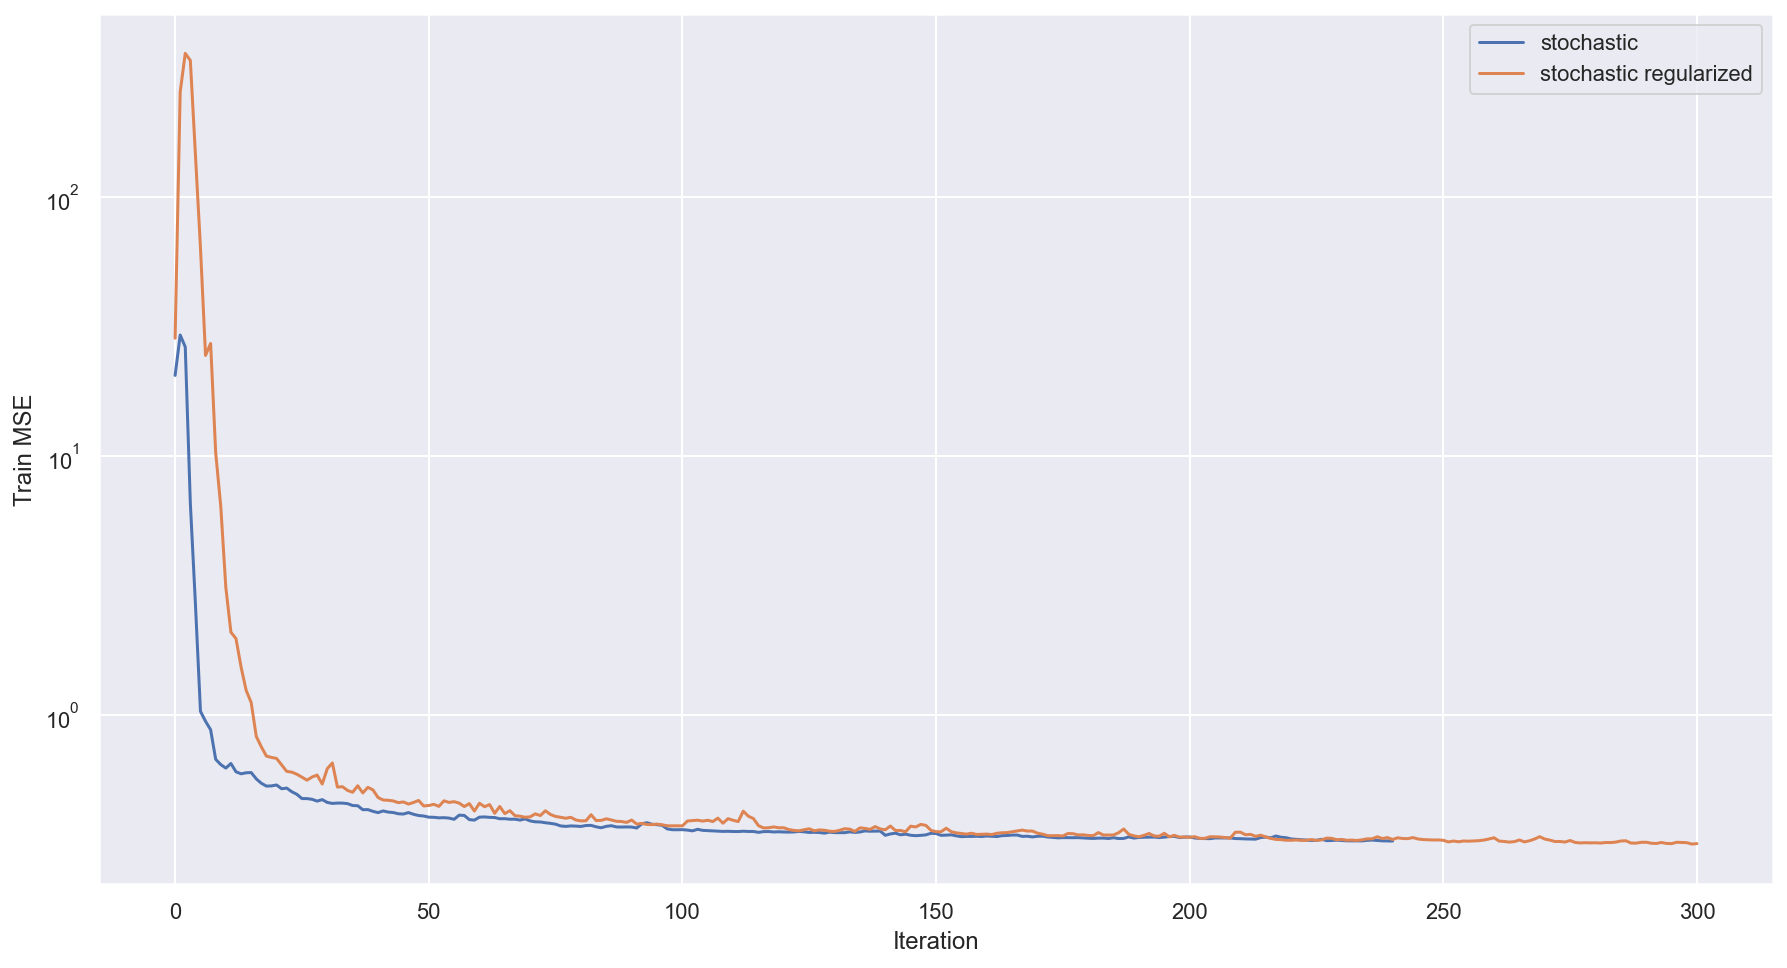

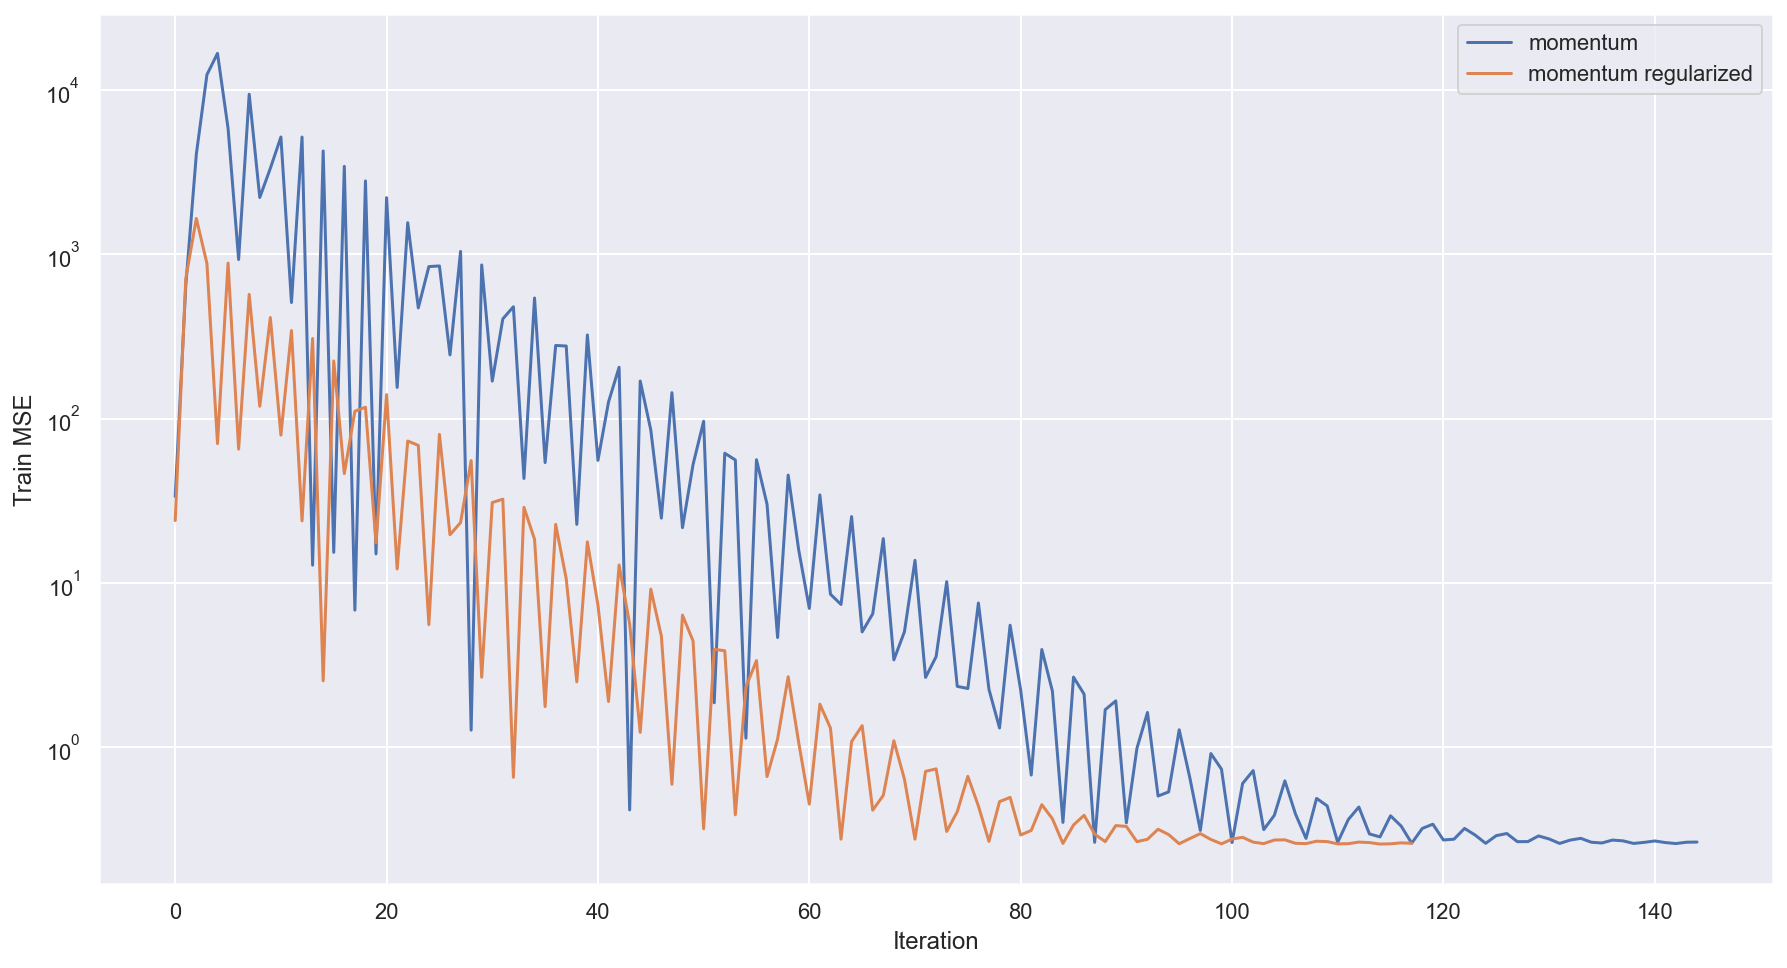

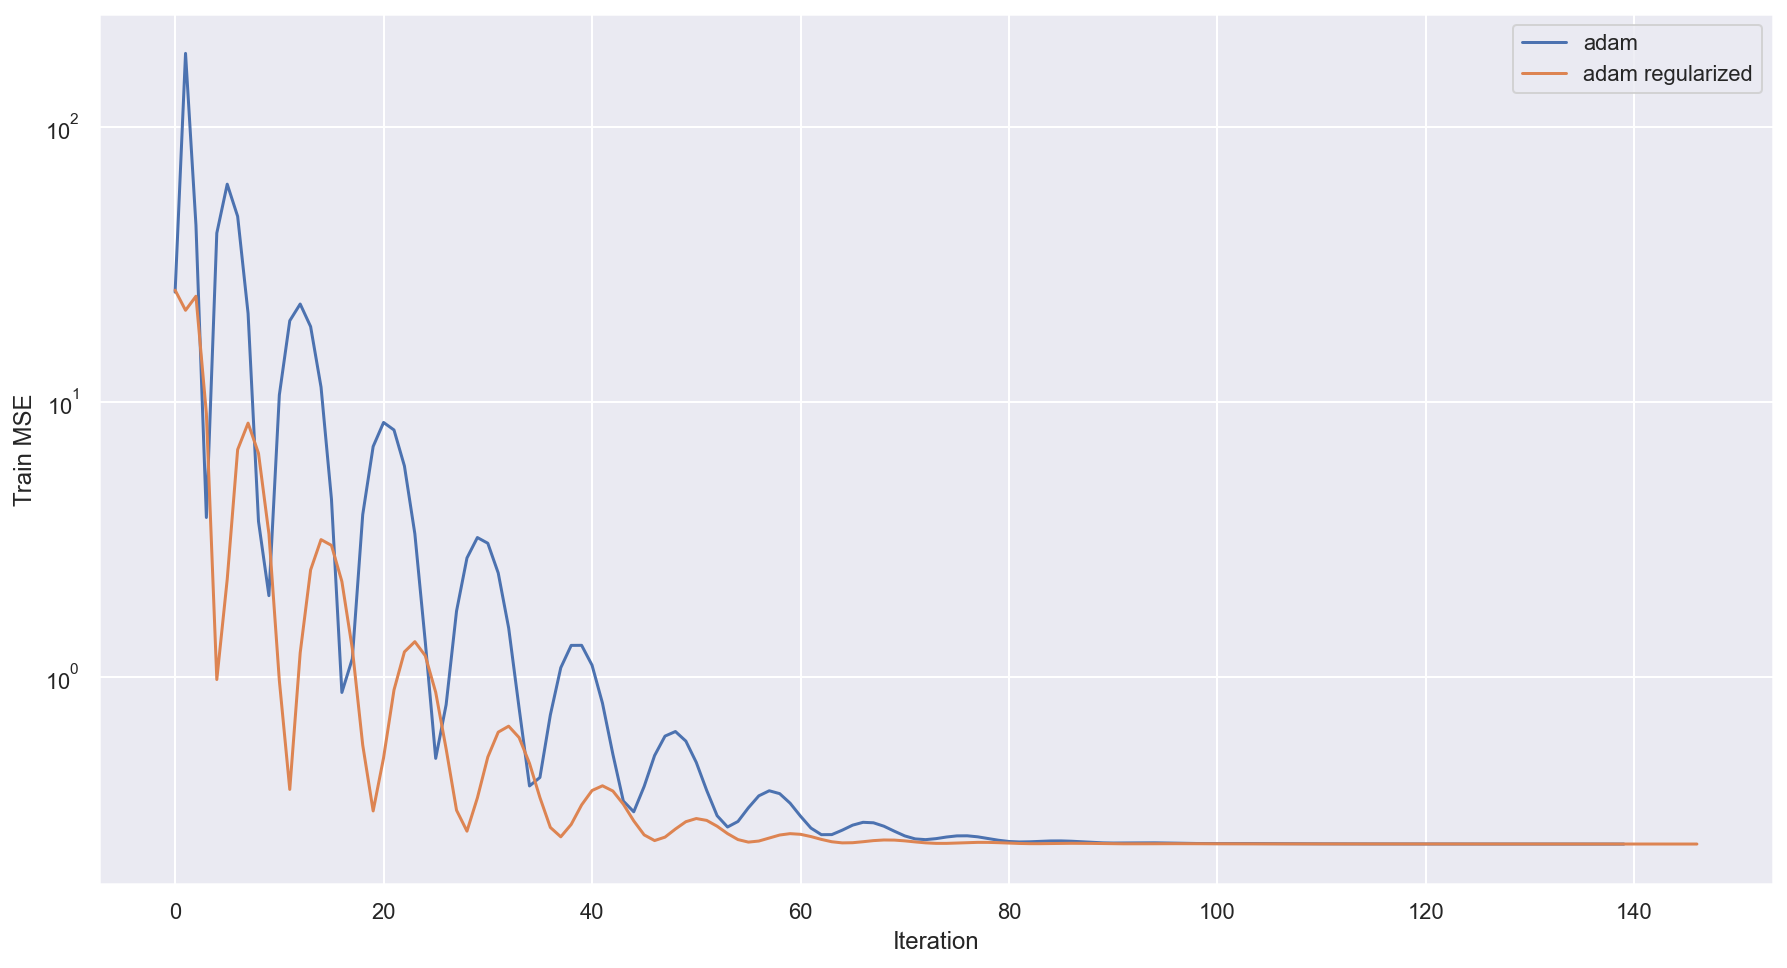

In [164]:
for i in range(4):
    plt.figure(figsize = (15, 8))
    plt.plot(best_model[i].loss_history, label = best[i]['descent_name'])
    plt.plot(best_model_m[i].loss_history, label = best_m[i]['descent_name'] + ' regularized')
    plt.xlabel('Iteration')
    plt.ylabel('Train MSE')
    plt.yscale('log')
    plt.legend()
    plt.show()

Как видно из графиков, количество итераций в adam и momentum в среднем станет меньше при использовании регуляризации, остальные же методы наоборот сходятся быстрее без нее.



## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регресии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

$$
    L(y, a=Xw)
    =
    \log\left(\cosh(Xw - y)\right)
$$

$$
    \partial_x \log(\cosh(f(x))) = \tanh(f(x)) \partial_x f(x)
$$

$$
    \partial_w L(y, Xw) = \frac{1}{l} \tanh(Xw-y)  X
$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

In [183]:
best_r2 = [0,0,0,0]
best_model_lc = [0,0,0,0]
best_lc = {}
i = 0
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    if descent_name == 'adam':
        lambdas = np.logspace(-1, 2, 15)
    else:
        lambdas = np.logspace(-1, 0.2, 15)
        
    for lambda_ in tqdm(lambdas):
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'lambda_': lambda_,
                'loss_function': 3,
                'dimension': X_train.shape[1],
            }
        }
        regression = LinearRegression(
            descent_config=descent_config)
        
        model = regression.fit(X_train, y_train)
        y_pred_val = model.predict(X_val)
        
        if r2_score(y_val, y_pred_val) > best_r2[i]:
            best_r2[i] = r2_score(y_val, y_pred_val)
            best_model_lc[i] = model
            best_lc[i] = {'descent_name' : descent_name, 
                       'iteration' : model.i,
                       'lambda' : lambda_, 
                       'Train R2' : r2_score(y_train, model.predict(X_train)),
                       'Test R2' : r2_score(y_test, model.predict(X_test)),
                       'Val R2' : r2_score(y_val, y_pred_val),
                       'Train loss' : model.calc_loss(X_train, y_train),
                       'Test loss' : model.calc_loss(X_test, y_test),
                       'Val loss' : model.calc_loss(X_val, y_val)}
    i+=1

 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [02:41<00:43, 14.37s/it]C:\Users\Ilya\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: overflow encountered in cosh
  result = getattr(ufunc, method)(*inputs, **kwargs)
 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [03:00<00:31, 15.52s/it]C:\Users\Ilya\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: overflow encountered in cosh
  result = getattr(ufunc, method)(*inputs, **kwargs)
 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [03:18<00:16, 16.48s/it]C:\Users\Ilya\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: overflow encountered in cosh
  result = getattr(ufunc, method)(*inputs, **kwargs)
100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [03:40<00:00, 14.70s/it]


In [245]:
df_lc = pd.DataFrame(best_lc).T.set_index('descent_name')
df_lc

,iteration,mu,lambda,Train R2,Test R2,Val R2,Train loss,Test loss,Val loss
descent_name,,,,,,,,,
full,52,10000,1.58489,0.691523,0.683455,0.689536,0.150841,0.153579,0.151084
stochastic,246,10000,1.30103,0.737135,0.727563,0.738648,0.128524,0.132061,0.12725
momentum,115,10000,1.58489,0.770012,0.759586,0.769735,0.110163,0.113382,0.109615
adam,196,10000,22.7585,0.797582,0.787349,0.798163,0.0977306,0.100961,0.0974158


In [185]:
df

,iteration,lambda,Train R2,Test R2,Val R2,Train loss,Test loss,Val loss
descent_name,,,,,,,,
full,67,1.58489,0.75434,0.748294,0.755171,0.305079,0.311948,0.303357
stochastic,239,0.459271,0.737662,0.728832,0.738152,0.32579,0.336067,0.324446
momentum,143,1.19086,0.787516,0.779034,0.787438,0.263877,0.27385,0.263378
adam,138,3.56225,0.802054,0.794065,0.803066,0.245824,0.255222,0.244014


LogCosh проигрывает по всем параметрам. Схожий лосс только в методе адам, в остальных меньше.

### Социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, пора гулять в парках и общаться со своими одногруппниками. Прикрепите фотографию вашей прогулки с минимум пятью одногруппниками по какому-нибудь парку или бульвару. Кратко опишите ваши впечатления.

![KEKW](https://sun9-38.userapi.com/impg/5bi-6razohuBdidZ8zEMCGpd6Yy10bXS9Hydaw/lYijETnswcY.jpg?size=1280x960&quality=96&sign=726cea16f88199fe8d1f1c3e5d8f31b1&type=album)

Надеюсь ассисту интересно в пятый раз смотреть одну и ту же фотку и читать одну и ту же интересную историю физиков. В общем сходили мы компанией факфиза (все ребята с МО) в сад имени Баумана (Сам бомонец там сзади на фотке). Как же я люблю БТC, вот они слева направо: Даша из института спектоскопии (4 курс фф, много знает, вкусно готовит, да и просто классный человек), правее стою я собственной персоной (очень умный, красивый, а главное скромный!), далее очаровательная Света из института космических исследований, после стоит Дима, он теоретик в институте теоретической физики имени Ландау (как и я), да еще и умный, ну и просто смешной, справа от нас стоит Марк, Марк экспериментатор в институте физических проблем, хорошо прогает и снимает лекции для всего факфиза!

Как это принято среди вышкинцев, главным обсуждением стали предыдущие домашки и предстоящая сессия.

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [275]:
best_r2 = -np.inf
lambdas = np.logspace(-1, 2, 10)    

for lambda_ in tqdm(lambdas):
    descent_config = {
        'descent_name': 'nadam',
        'kwargs': {
            'lambda_': lambda_,
            'dimension': X_train.shape[1],
        }
    }
    regression = LinearRegression(
        descent_config=descent_config)
    
    model = regression.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)
    
    if r2_score(y_val, y_pred_val) > best_r2:
        best_r2 = r2_score(y_val, y_pred_val)
        best_model_ams = model
        best_ams = {'descent_name' : [descent_name], 
                   'iteration' : [model.i],
                   'lambda' : [lambda_], 
                   'Train R2' : [r2_score(y_train, model.predict(X_train))],
                   'Test R2' : [r2_score(y_test, model.predict(X_test))],
                   'Val R2' : [r2_score(y_val, y_pred_val)],
                   'Train loss' : [model.calc_loss(X_train, y_train)],
                   'Test loss' : [model.calc_loss(X_test, y_test)],
                   'Val loss' : [model.calc_loss(X_val, y_val)]}

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [02:45<00:00, 16.58s/it]


In [281]:
df_ams = pd.DataFrame(best_ams).set_index('descent_name')
df_ams

,iteration,lambda,Train R2,Test R2,Val R2,Train loss,Test loss,Val loss
descent_name,,,,,,,,
adam,161,1.0,0.801807,0.793874,0.80272,0.24613,0.255458,0.244441


Очень хороший метод, близок к адаму, выдает схожее качество. Наверное можно покрутить параметры и получить лучше, но оставим как есть

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

MAE:
$$
   L(y, a) = \frac{\sum_{i}^{n} |a - y|}{n}
$$

$$
    \partial_w L(y, Xw) = sgn(Xw-y) X
$$

Huber:

$$
L(a) = \begin{cases}
 \dfrac{1}{2\ell} \left( y - Xw \right)^T \left( y - Xw \right)                   & \text{для } |y - Xw| \le \delta, \\
 \delta (|y - Xw| - \frac{1}{2}\delta),  & \text{иначе.}
\end{cases}
$$

$$
\partial_w L(a) = \begin{cases}
 \dfrac{1}{\ell} \left( y - Xw \right)^T X                   & \text{для } |a| \le \delta, \\
 \delta \cdot sgn(Xw-y) X,  & \text{иначе.}
\end{cases}
$$

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [234]:
best_r2 = [0,0,0,0]
best_model_mae = [0,0,0,0]
best_mae = {}
i = 0
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    if descent_name == 'adam':
        lambdas = np.logspace(-1, 2, 15)
    else:
        lambdas = np.logspace(-1, 0.2, 15)
        
    for lambda_ in tqdm(lambdas):
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'lambda_': lambda_,
                'loss_function': 2,
                'dimension': X_train.shape[1],
            }
        }
        regression = LinearRegression(
            descent_config=descent_config)
        
        model = regression.fit(X_train, y_train)
        y_pred_val = model.predict(X_val)
        
        if r2_score(y_val, y_pred_val) > best_r2[i]:
            best_r2[i] = r2_score(y_val, y_pred_val)
            best_model_mae[i] = model
            best_mae[i] = {'descent_name' : descent_name, 
                       'iteration' : model.i,
                       'lambda' : lambda_, 
                       'Train R2' : r2_score(y_train, model.predict(X_train)),
                       'Test R2' : r2_score(y_test, model.predict(X_test)),
                       'Val R2' : r2_score(y_val, y_pred_val),
                       'Train loss' : model.calc_loss(X_train, y_train),
                       'Test loss' : model.calc_loss(X_test, y_test),
                       'Val loss' : model.calc_loss(X_val, y_val)}
    i+=1

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [03:02<00:00, 12.16s/it]


In [235]:
df_mae = pd.DataFrame(best_mae).T.set_index('descent_name')
df_mae

,iteration,lambda,Train R2,Test R2,Val R2,Train loss,Test loss,Val loss
descent_name,,,,,,,,
full,54,1.58489,0.726647,0.716303,0.72605,0.396952,0.401631,0.395866
stochastic,299,1.58489,0.755947,0.745077,0.754023,0.364274,0.368776,0.363782
momentum,138,1.58489,0.770552,0.759968,0.767526,0.337496,0.341915,0.338707
adam,299,8.48343,0.782283,0.770083,0.782537,0.326011,0.330976,0.326983


In [236]:
df

,iteration,lambda,Train R2,Test R2,Val R2,Train loss,Test loss,Val loss
descent_name,,,,,,,,
full,67,1.58489,0.75434,0.748294,0.755171,0.305079,0.311948,0.303357
stochastic,239,0.459271,0.737662,0.728832,0.738152,0.32579,0.336067,0.324446
momentum,143,1.19086,0.787516,0.779034,0.787438,0.263877,0.27385,0.263378
adam,138,3.56225,0.802054,0.794065,0.803066,0.245824,0.255222,0.244014


Стохастический сошелся получше (хоть и медленнее), остальные же сходятся хуже чем на MSE (адам не успел вообще сойтись до конца за 300 итераций).

In [237]:
best_r2 = [-np.inf,-np.inf,-np.inf,-np.inf]
best_model_huber = [0,0,0,0]
best_huber = {}
i = 0
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    if descent_name == 'adam':
        lambdas = np.logspace(-1, 2, 15)
    else:
        lambdas = np.logspace(-1, 0.2, 15)
        
    for lambda_ in tqdm(lambdas):
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'lambda_': lambda_,
                'loss_function': 4,
                'dimension': X_train.shape[1],
            }
        }
        regression = LinearRegression(
            descent_config=descent_config)
        
        model = regression.fit(X_train, y_train)
        y_pred_val = model.predict(X_val)
        
        if r2_score(y_val, y_pred_val) > best_r2[i]:
            best_r2[i] = r2_score(y_val, y_pred_val)
            best_model_huber[i] = model
            best_huber[i] = {'descent_name' : descent_name, 
                       'iteration' : model.i,
                       'lambda' : lambda_, 
                       'Train R2' : r2_score(y_train, model.predict(X_train)),
                       'Test R2' : r2_score(y_test, model.predict(X_test)),
                       'Val R2' : r2_score(y_val, y_pred_val),
                       'Train loss' : model.calc_loss(X_train, y_train),
                       'Test loss' : model.calc_loss(X_test, y_test),
                       'Val loss' : model.calc_loss(X_val, y_val)}
    i+=1

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [06:28<00:00, 25.92s/it]


In [239]:
df_huber = pd.DataFrame(best_huber).T.set_index('descent_name')
df_huber

,iteration,lambda,Train R2,Test R2,Val R2,Train loss,Test loss,Val loss
descent_name,,,,,,,,
full,60,1.58489,0.727742,0.717082,0.726353,0.105963,0.100065,0.105661
stochastic,299,1.30103,0.739935,0.730783,0.739622,0.115638,0.112456,0.116045
momentum,168,1.58489,0.768186,0.755661,0.764506,0.16097,0.15558,0.158776
adam,299,13.895,0.782968,0.771144,0.783416,0.170351,0.165714,0.169408


In [240]:
df

,iteration,lambda,Train R2,Test R2,Val R2,Train loss,Test loss,Val loss
descent_name,,,,,,,,
full,67,1.58489,0.75434,0.748294,0.755171,0.305079,0.311948,0.303357
stochastic,239,0.459271,0.737662,0.728832,0.738152,0.32579,0.336067,0.324446
momentum,143,1.19086,0.787516,0.779034,0.787438,0.263877,0.27385,0.263378
adam,138,3.56225,0.802054,0.794065,0.803066,0.245824,0.255222,0.244014


In [241]:
df_m

,iteration,mu,lambda,Train R2,Test R2,Val R2,Train loss,Test loss,Val loss
descent_name,,,,,,,,,
full,55,5.99484e-05,1.58489,0.747112,0.737575,0.750971,0.314054,0.325231,0.308562
stochastic,299,4.64159e-06,0.876712,0.74359,0.732257,0.74413,0.318428,0.331823,0.317038
momentum,116,0.01,1.30103,0.791164,0.783077,0.791497,0.259347,0.26884,0.258348
adam,145,1.6681e-05,1.9307,0.802013,0.793864,0.803244,0.245875,0.255471,0.243793


In [274]:
df['loss_func'], df_lc['loss_func'], df_mae['loss_func'], df_huber['loss_func'] = 'MSE', 'LogCosh', 'MAE', 'Huber'
p = ['full', 'stochastic', 'momentum', 'adam']
for i in range(4):
    print(p[i], ':')
    display(pd.concat([df.iloc[i], df_lc.iloc[i], df_mae.iloc[i], df_huber.iloc[i]], axis = 1).T.set_index('loss_func'))

full :


,iteration,lambda,Train R2,Test R2,Val R2,Train loss,Test loss,Val loss,mu
loss_func,,,,,,,,,
MSE,67,1.58489,0.75434,0.748294,0.755171,0.305079,0.311948,0.303357,NaN
LogCosh,52,1.58489,0.691523,0.683455,0.689536,0.150841,0.153579,0.151084,10000
MAE,54,1.58489,0.726647,0.716303,0.72605,0.396952,0.401631,0.395866,NaN
Huber,60,1.58489,0.727742,0.717082,0.726353,0.105963,0.100065,0.105661,NaN


stochastic :


,iteration,lambda,Train R2,Test R2,Val R2,Train loss,Test loss,Val loss,mu
loss_func,,,,,,,,,
MSE,239,0.459271,0.737662,0.728832,0.738152,0.32579,0.336067,0.324446,NaN
LogCosh,246,1.30103,0.737135,0.727563,0.738648,0.128524,0.132061,0.12725,10000
MAE,299,1.58489,0.755947,0.745077,0.754023,0.364274,0.368776,0.363782,NaN
Huber,299,1.30103,0.739935,0.730783,0.739622,0.115638,0.112456,0.116045,NaN


momentum :


,iteration,lambda,Train R2,Test R2,Val R2,Train loss,Test loss,Val loss,mu
loss_func,,,,,,,,,
MSE,143,1.19086,0.787516,0.779034,0.787438,0.263877,0.27385,0.263378,NaN
LogCosh,115,1.58489,0.770012,0.759586,0.769735,0.110163,0.113382,0.109615,10000
MAE,138,1.58489,0.770552,0.759968,0.767526,0.337496,0.341915,0.338707,NaN
Huber,168,1.58489,0.768186,0.755661,0.764506,0.16097,0.15558,0.158776,NaN


adam :


,iteration,lambda,Train R2,Test R2,Val R2,Train loss,Test loss,Val loss,mu
loss_func,,,,,,,,,
MSE,138,3.56225,0.802054,0.794065,0.803066,0.245824,0.255222,0.244014,NaN
LogCosh,196,22.7585,0.797582,0.787349,0.798163,0.0977306,0.100961,0.0974158,10000
MAE,299,8.48343,0.782283,0.770083,0.782537,0.326011,0.330976,0.326983,NaN
Huber,299,13.895,0.782968,0.771144,0.783416,0.170351,0.165714,0.169408,NaN


У ванильного спуска лучший результат по R2 получился при использовании ф.п. MSE, сходится он довольно быстро на всех ф.п., однако качество на остальных метриках получилось сильно слабее.

Стохастический спуск показал хороший результат при использовании MAE. Количество итераций, насколько я понимаю, носит флуктуативный характер, так как из-за батчей SGD не может дойти до момента, когда норма разности весов будет меньше заданной константы.

Инерционный спуск лучше всего показал себя на MSE. Сходится он при этом ощутимо медленнее, чем LogCosh, однако последний показал самый слабый результат по качеству.

Адам показал лучший результат на MSE, но и LogCosh от него ушел не очень далеко. Сходимость самая быстрая опять же на MSE. MAE и Huber не успели сойтись к минимуму по условию максимального количества итераций.

В целом MSE оказался стабильно хорошей функцией потерь, думаю, что сила MSE в простоте! Кроме того, мы чистили выборку от предполагаемых выбросов, поэтому один из главных минусов MSE (то бишь зависимость от выбросов) играл не решающую роль